<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

# data manipulation

## 1. introduction

* learn how to rename columns in a data frame.
* change the order of a data frame's columns.
* filter records based on conditional statements.
* create additional categories via binning and conditional statements.
* learn how to one-hot encode categorical variables.
* combine data frames via merging and concatenation.
* melt data from wide format into long format.

## 2. data loading

vehicles dataset :-D

In [1]:
import pandas as pd
import numpy as np

Load `.csv` inside zip file...

In [2]:
from zipfile import ZipFile

z = ZipFile('./data/vehicles.zip')

z.infolist()

[<ZipInfo filename='vehicles/' filemode='drwxr-xr-x' external_attr=0x4000>,
 <ZipInfo filename='vehicles/.DS_Store' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=6148 compress_size=178>,
 <ZipInfo filename='__MACOSX/' filemode='drwxrwxr-x' external_attr=0x4000>,
 <ZipInfo filename='__MACOSX/vehicles/' filemode='drwxrwxr-x' external_attr=0x4000>,
 <ZipInfo filename='__MACOSX/vehicles/._.DS_Store' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=120 compress_size=53>,
 <ZipInfo filename='vehicles/vehicles_tab.txt' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=4959721 compress_size=300366>,
 <ZipInfo filename='vehicles/vehicles_pipe.txt' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=4959721 compress_size=300359>,
 <ZipInfo filename='vehicles/vehicles.json' compress_type=deflate filemode='-rw-r--r--' external_attr=0x4000 file_size=13100011 compress_size=413028>,
 <ZipInfo filena

In [3]:
vehicles = pd.read_csv(z.open('vehicles/vehicles.csv'))

In [4]:
vehicles.head().T

,0,1,2,3,4
Make,AM General,AM General,AM General,AM General,ASC Incorporated
Model,DJ Po Vehicle 2WD,FJ8c Post Office,Post Office DJ5 2WD,Post Office DJ8 2WD,GNX
Year,1984,1984,1985,1985,1987
Engine Displacement,2.5,4.2,2.5,4.2,3.8
Cylinders,4,6,4,6,6
Transmission,Automatic 3-spd,Automatic 3-spd,Automatic 3-spd,Automatic 3-spd,Automatic 4-spd
Drivetrain,2-Wheel Drive,2-Wheel Drive,Rear-Wheel Drive,Rear-Wheel Drive,Rear-Wheel Drive
Vehicle Class,Special Purpose Vehicle 2WD,Special Purpose Vehicle 2WD,Special Purpose Vehicle 2WD,Special Purpose Vehicle 2WD,Midsize Cars
Fuel Type,Regular,Regular,Regular,Regular,Premium
Fuel Barrels/Year,19.3888,25.3546,20.6006,25.3546,20.6006


## 3. renaming columns

### the hard way

just reassign a list or array to columns attribute of a df...

In [5]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [6]:
vehicles.columns.to_list()

['Make',
 'Model',
 'Year',
 'Engine Displacement',
 'Cylinders',
 'Transmission',
 'Drivetrain',
 'Vehicle Class',
 'Fuel Type',
 'Fuel Barrels/Year',
 'City MPG',
 'Highway MPG',
 'Combined MPG',
 'CO2 Emission Grams/Mile',
 'Fuel Cost/Year']

In [7]:
vehicles.columns = \
['Manufacturer', 
 'Model', 
 'Year', 
 'Displacement', 
 'Cylinders',
 'Transmission', 
 'Drivetrain', 
 'Vehicle Class', 
 'Fuel Type',      
 'Fuel Barrels/Year', 
 'City MPG', 
 'Highway MPG', 
 'Combined MPG',
 'CO2 Emission Grams/Mile', 
 'Fuel Cost/Year']

In [8]:
vehicles.head()

,Manufacturer,Model,Year,Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


### the 'good' way

using rename method, for both index and columns...

In [9]:
vehicles.rename(index={e: e+1 for e in range(len(vehicles))}, 
                columns={'Manufacturer': 'Make', 
                         'Displacement': 'Engine Displacement'}).head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
3,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
4,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
5,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [10]:
vehicles.head()

,Manufacturer,Model,Year,Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


what happened?

In [11]:
vehicles.rename(index={e: e+1 for e in range(len(vehicles))}, 
                columns={'Manufacturer': 'Make', 
                         'Displacement': 'Engine Displacement'}, 
                inplace=True)

## 4. column order and selection

just write a list with variables in order...

In [12]:
columns = ['Year', 'Model', 'Make']

In [13]:
vehicles[columns].head()

,Year,Model,Make
1,1984,DJ Po Vehicle 2WD,AM General
2,1984,FJ8c Post Office,AM General
3,1985,Post Office DJ5 2WD,AM General
4,1985,Post Office DJ8 2WD,AM General
5,1987,GNX,ASC Incorporated


select methods loc and iloc... to select by index and column name (this is the most usual case) just use `loc` selector...

In [14]:
vehicles.loc[5:10, columns]

,Year,Model,Make
5,1987,GNX,ASC Incorporated
6,1997,2.2CL/3.0CL,Acura
7,1997,2.2CL/3.0CL,Acura
8,1997,2.2CL/3.0CL,Acura
9,1998,2.3CL/3.0CL,Acura
10,1998,2.3CL/3.0CL,Acura


In [15]:
vehicles.loc[5:10, 'Make':'Cylinders']

,Make,Model,Year,Engine Displacement,Cylinders
5,ASC Incorporated,GNX,1987,3.8,6.0
6,Acura,2.2CL/3.0CL,1997,2.2,4.0
7,Acura,2.2CL/3.0CL,1997,2.2,4.0
8,Acura,2.2CL/3.0CL,1997,3.0,6.0
9,Acura,2.3CL/3.0CL,1998,2.3,4.0
10,Acura,2.3CL/3.0CL,1998,2.3,4.0


by index and column position using `iloc`:

In [16]:
vehicles.iloc[4:6, 4:6]

,Cylinders,Transmission
5,6.0,Automatic 4-spd
6,4.0,Automatic 4-spd


## 5. record filtering

In [17]:
filter_maker = vehicles['Make'] == 'Ford'
filter_cylinders = vehicles['Cylinders'].between(5, 15)
filter_consumption = vehicles['Combined MPG'] < 18

filter_full = filter_maker & filter_cylinders & filter_consumption

In [18]:
vehicles[filter_full].head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
11443,Ford,Aerostar Van,1986,2.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,21,17,522.764706,1950
11451,Ford,Aerostar Van,1988,3.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,20,17,522.764706,1950
11453,Ford,Aerostar Van,1989,3.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,21,17,522.764706,1950
11457,Ford,Aerostar Van,1990,4.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,20,17,522.764706,1950
11460,Ford,Aerostar Van,1991,4.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,20,17,522.764706,1950


In [19]:
vehicles.loc[filter_full, ['Make', 'Cylinders', 'Combined MPG']].head()

,Make,Cylinders,Combined MPG
11443,Ford,6.0,17
11451,Ford,6.0,17
11453,Ford,6.0,17
11457,Ford,6.0,17
11460,Ford,6.0,17


## 6. binning

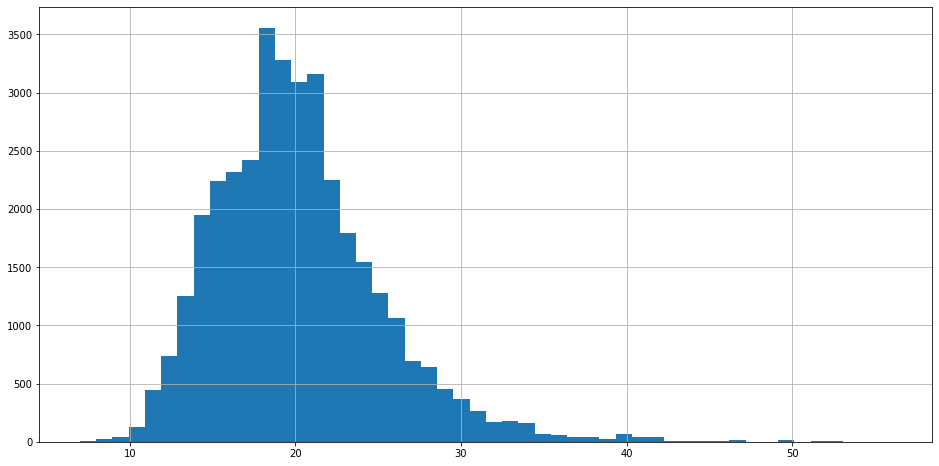

In [20]:
vehicles['Combined MPG'].hist(bins=50, figsize=(16, 8));

### bins of equal size (independent of number of observations)

In [21]:
pd.cut(vehicles['Combined MPG'], bins=5)

1         (16.8, 26.6]
2        (6.951, 16.8]
3        (6.951, 16.8]
4        (6.951, 16.8]
5        (6.951, 16.8]
             ...      
35948     (26.6, 36.4]
35949     (26.6, 36.4]
35950     (26.6, 36.4]
35951     (26.6, 36.4]
35952     (26.6, 36.4]
Name: Combined MPG, Length: 35952, dtype: category
Categories (5, interval[float64]): [(6.951, 16.8] < (16.8, 26.6] < (26.6, 36.4] < (36.4, 46.2] < (46.2, 56.0]]

In [22]:
mpg_labels = ['very low', 'low', 'moderate', 'high', 'very high']
new_mpg = pd.cut(vehicles['Combined MPG'], bins=5, labels=mpg_labels)

In [23]:
new_mpg

1             low
2        very low
3        very low
4        very low
5        very low
           ...   
35948    moderate
35949    moderate
35950    moderate
35951    moderate
35952    moderate
Name: Combined MPG, Length: 35952, dtype: category
Categories (5, object): [very low < low < moderate < high < very high]

In [24]:
new_mpg.value_counts()

low          23444
very low      9137
moderate      3052
high           275
very high       44
Name: Combined MPG, dtype: int64

### bins of equal number of elements (based on quantiles)

warning, this is not a continuous variable, so equal size is not possible, but bins are more balanced...

In [25]:
new_mpg_qc = pd.qcut(vehicles['Combined MPG'],
                  q=[0.0, .2, .4, .6, .8, 1.0], 
                  labels=mpg_labels)

In [26]:
new_mpg_qc.value_counts()

moderate     9533
very low     9137
low          5979
very high    5716
high         5587
Name: Combined MPG, dtype: int64

## 7. conditional assignment with selectors

In [27]:
transmission_filter_a = vehicles.Transmission.str.startswith('A')

In [28]:
transmission_filter_a.value_counts()

True     24290
False    11662
Name: Transmission, dtype: int64

In [29]:
transmission_filter_m = vehicles.Transmission.str.startswith('M')

In [30]:
transmission_filter_m.value_counts()

False    24290
True     11662
Name: Transmission, dtype: int64

In [31]:
vehicles.loc[transmission_filter_a, 'type of transmission'] = 'Auto'
vehicles.loc[transmission_filter_m, 'type of transmission'] = 'Manual'

In [32]:
vehicles['type of transmission'].value_counts()

Auto      24290
Manual    11662
Name: type of transmission, dtype: int64

with a single filter, using `~`

In [33]:
vehicles.loc[transmission_filter_a, 'new type of transmission'] = 'Auto'
vehicles.loc[~transmission_filter_a, 'new type of transmission'] = 'Manual'

In [34]:
s = transmission_filter_a.sample(10)

In [35]:
s.head()

20741    False
22417    False
11724     True
8196     False
25669     True
Name: Transmission, dtype: bool

In [36]:
~s.head()

20741     True
22417     True
11724    False
8196      True
25669    False
Name: Transmission, dtype: bool

## 8. one hot encoding for categorical variables...

useful for some ML algorithms (linear based models and more)...

In [37]:
drivetrain_dummy = pd.get_dummies(vehicles['Drivetrain'])
drivetrain_dummy.head()

,2-Wheel Drive,"2-Wheel Drive, Front",4-Wheel Drive,4-Wheel or All-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Part-time 4-Wheel Drive,Rear-Wheel Drive
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1


## 9. merge

In [38]:
avg_mpg = vehicles.groupby('Make', as_index=False).agg({'Combined MPG': 'mean'})
avg_mpg.columns = ['Make', 'Avg_MPG']

In [39]:
avg_mpg.head()

,Make,Avg_MPG
0,AM General,14.750000
1,ASC Incorporated,16.000000
2,Acura,21.506623
3,Alfa Romeo,19.512195
4,American Motors Corporation,17.681818


In [40]:
vehicles_enriched = pd.merge(vehicles, avg_mpg, on='Make')

In [41]:
vehicles_enriched.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,type of transmission,new type of transmission,Avg_MPG
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,Auto,Auto,14.75
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,Auto,Auto,14.75
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,Auto,Auto,14.75
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,Auto,Auto,14.75
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,Auto,Auto,16.00


## 10. concatenate

In [42]:
drivetrain_dummy.head()

,2-Wheel Drive,"2-Wheel Drive, Front",4-Wheel Drive,4-Wheel or All-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Part-time 4-Wheel Drive,Rear-Wheel Drive
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1


In [43]:
vehicles_enriched.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,type of transmission,new type of transmission,Avg_MPG
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,Auto,Auto,14.75
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,Auto,Auto,14.75
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,Auto,Auto,14.75
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,Auto,Auto,14.75
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,Auto,Auto,16.00


In [44]:
drivetrain_dummy.shape

(35952, 8)

In [45]:
vehicles_enriched.shape

(35952, 18)

warning with index alignment!

In [46]:
pd.concat([vehicles_enriched.reset_index(drop=True), 
           drivetrain_dummy.reset_index(drop=True)], axis=1)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,...,new type of transmission,Avg_MPG,2-Wheel Drive,"2-Wheel Drive, Front",4-Wheel Drive,4-Wheel or All-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Part-time 4-Wheel Drive,Rear-Wheel Drive
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,...,Auto,14.75,1,0,0,0,0,0,0,0
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,...,Auto,14.75,1,0,0,0,0,0,0,0
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,...,Auto,14.75,0,0,0,0,0,0,0,1
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,...,Auto,14.75,0,0,0,0,0,0,0,1
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,...,Auto,16.00,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,...,Auto,35.80,0,0,0,0,0,0,0,1
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,...,Auto,35.80,0,0,0,0,0,0,0,1
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,...,Auto,35.80,0,0,0,0,0,0,0,1
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,...,Auto,35.80,0,0,0,0,0,0,0,1


## 11. melting

In [47]:
pd.melt(vehicles, id_vars=['Year', 'Make', 'Model'], 
        value_vars=['City MPG','Highway MPG','Combined MPG'])

,Year,Make,Model,variable,value
0,1984,AM General,DJ Po Vehicle 2WD,City MPG,18
1,1984,AM General,FJ8c Post Office,City MPG,13
2,1985,AM General,Post Office DJ5 2WD,City MPG,16
3,1985,AM General,Post Office DJ8 2WD,City MPG,13
4,1987,ASC Incorporated,GNX,City MPG,14
...,...,...,...,...,...
107851,2013,smart,fortwo coupe,Combined MPG,36
107852,2014,smart,fortwo coupe,Combined MPG,36
107853,2015,smart,fortwo coupe,Combined MPG,36
107854,2016,smart,fortwo coupe,Combined MPG,36


<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>